In [1]:
from numpy import exp, sqrt, linspace, Inf
from math import factorial

from scipy.special import hyp1f1
from scipy.integrate import quad

from matplotlib.pyplot import plot, show
%matplotlib inline

In [2]:
# Funcion Rnl radial hidrogénica

def Rnl(Z,n,l,r):
    a=1.0
    rnum = ((2 * Z)/(n * a))**3
    rnum = rnum * factorial(n+l)
    rden = 2 * n * factorial(n-l-1)
    rf1 = sqrt(rnum/rden)
    Nnl = rf1 / factorial(2*l + 1)
    rho = 2*Z*r/(n*a)
    rf1 = hyp1f1(l+1-n,2*l+2,rho)
    Rnl = Nnl * rho**l * exp(-rho/2) * rf1
    return Rnl
    
    

In [3]:
# Hydrogenic Energies 

def Ener(Z,n,l):
    E = -1./2. * Z**2 / (n**2)
    return E

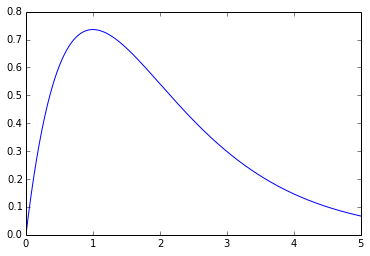

In [4]:
# Ploteo de función de onda

rmin=0.0
rmax=5.0
npts=1000
x = linspace(rmin,rmax,npts)

plot(x,x*Rnl(1,1,0,x));
show()

In [5]:
# Chequeo ortogonalización

def overlap(Z,n1,l1,n2,l2):
    
    def integrand(r,Z,n1,l1,n2,l2):
        return Rnl(Z,n1,l1,r) * Rnl(Z,n2,l2,r) * r**2
    
    I12 = quad( integrand,  0 ,Inf, args=(Z,n1,l1,n2,l2))
    return I12

print overlap(1,1,0,2,0)
print overlap(1,2,0,2,0)
print overlap(1,4,1,4,1)
print overlap(10,4,2,4,2)

(-2.1852973583128118e-17, 4.6259256621873266e-10)
(1.0000000000000002, 1.4047352489192893e-09)
(1.0, 1.6331887725507387e-09)
(0.9999999999999999, 4.323470015543176e-09)


# Polarizabilidad 

In [6]:
# Operador Dipolar

def dipolo(Z,n1,l1,n2,l2):
    
    def integrand(r,Z,n1,l1,n2,l2):
        return Rnl(Z,n1,l1,r) * Rnl(Z,n2,l2,r) * r**3
    
    I12 = quad( integrand,  0 ,Inf, args=(Z,n1,l1,n2,l2))
    return I12

In [9]:
# Cálculo de Polarizabilidad: 1/3 Sum dipolo(1s,np)^2/(E1-Enp)

nmax=50
sum=0.0
for n in range(2,nmax):
    d1,err = dipolo(1,1,0,n,1)
    rnum = d1**2
    rden = Ener(1,1,0) - Ener(1,n,1)
    pol = 2./3. * rnum / rden
    sum = sum + pol
    print pol, sum

-2.95962110564 -2.95962110564
-0.400451660156 -3.36007276579
-0.131941395333 -3.49201416112
-0.0604962841808 -3.55251044531
-0.0330061797991 -3.5855166251
-0.0200664859469 -3.60558311105
-0.0131411622467 -3.6187242733
-0.00908743109321 -3.62781170439
-0.00655185111574 -3.63436355551
-0.00488245196215 -3.63924600747
-0.00373746969577 -3.64298347717
-0.00292547675668 -3.64590895392
-0.00233336116723 -3.64824231509
-0.00189126991468 -3.650133585
-0.00155443393527 -3.65168801894
-0.00129323754527 -3.65298125648
-0.00108754603452 -3.65406880252
-0.000923339605726 -3.65499214212
-0.000790648656919 -3.65578279078
-0.000682249960131 -3.65646504074
-0.000592821885496 -3.65705786263
-0.000518384359828 -3.65757624699
-0.000455919871723 -3.65803216686
-0.000403112187789 -3.65843527905
-0.000358163158571 -3.65879344221
-0.00031966228638 -3.65911310449
-0.000286492542895 -3.65939959703
-0.000257761476474 -3.65965735851
-0.00023275021342 -3.65989010872
-0.000210875286178 -3.66010098401
-0.00019165976

In [ ]:
from numpy import array
nsize=5

U = array([nsize,nsize])
psi1s=array([nsize])

for i in range(0,nsize):
    for j in range(0,nsize):
        print i, j
        U[i][j]= i*2 + 3*j
